In [1]:
import torch # torch will allow us to create tensors.
import torch.nn as nn # torch.nn allows us to create a neural network.
import torch.nn.functional as F # nn.functional give us access to the activation and loss functions.
from torch.optim import SGD # optim contains many optimizers. Here, we're using SGD, stochastic gradient descent.
import numpy as np
import lightning.pytorch as pl # lightning has tons of cool tools that make neural networks easier
from torch.utils.data import TensorDataset, DataLoader # these are needed for the training data
from torch import float64
import random
from tqdm import tqdm

C:\Users\paras\anaconda3\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [6]:
#path to dataset
x_path = "../Assignment 1 Data/2-1-x.txt"
y_path = "../Assignment 1 Data/2-1-f_x.txt"

#variable to hold things
x_raw = None
y_raw = None

# load the values into the variables
with open(x_path, "r") as x:
    x_raw = x.readlines()
    x_raw = list(map(lambda val: float(val), x_raw))

with open(y_path, "r") as y:
    y_raw = y.readlines()
    y_raw = list(map(lambda val: float(val), y_raw))


In [16]:
#Convert to torch tensors
x = torch.tensor(x_raw, dtype=float64, requires_grad=False)
y = torch.tensor(y_raw, dtype=float64, requires_grad=False)
cjk = torch.tensor([0] * 49, dtype=float64, requires_grad=True)


In [53]:

# dataset = TensorDataset(x, y, )
# dataloader = DataLoader(dataset, num_workers=10, shuffle=True)

optimizer = SGD([cjk], lr=0.25, momentum=0.9)

In [59]:
# function to convert j,k in the f(x) to 0 based index in cjk tensor
# 7 because that is sqrt(49)
def jkToIndex(j, k):
    J = j + 3
    K = k + 3
    return (7*J + K)

#math functions
def psi(x):
    a = 1 + torch.exp(2 - (10 * x))
    b = 1 + torch.exp(2 + (10 * x))
    # a = a.to("cuda")
    # b = b.to("cuda")
    res =  (1 - (1 / a)) * (1 - (1 / b))
    # res = res.to("cuda")
    return res


#here c is a tensor of 49 values [-3-3,.......]
#x is now a tensor too ( try a tensor operation directly!)
#fx -> is also a tensor
def f(x, c):
    fx = torch.zeros(len(x), dtype=float64)
    for j in range(-3, 4):
        for k in range(-3, 4):
            i = jkToIndex(j,k)
            cjk = c[i]
            # cjk = cjk.to("cuda")
            multiplier = x - k
            # multiplier = multiplier.to("cuda")
            psi_inp = (2 ** j) * multiplier
            psi_out = psi(psi_inp)
            # psi_out = psi_out.to("cuda")
            cjkTerm = cjk * psi_out
            fx += cjkTerm
            # fx = fx.to("cuda")
    return fx


def train(cjk=cjk, optimizer=optimizer, num_epochs=200):
    # for epoch in tqdm(range(num_epochs)):
    for epoch in range(num_epochs):
        print("+" * 50)
        y_p = f(x, cjk)
        epoch_loss = nn.MSELoss()(y, y_p)

        # backward() calculates the derivative for that single value and adds it to the previous one.
        epoch_loss.backward()


        optimizer.step()  ## take a step toward the optimal value.
        optimizer.zero_grad()

        print(f"Epoch #: {epoch} | Epoch loss: {epoch_loss.data} \n")



In [65]:
train(num_epochs=1000)

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 0 | Epoch loss: 1.0751654892795307e-07 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 1 | Epoch loss: 1.075040460250492e-07 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 2 | Epoch loss: 1.0749154567405209e-07 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 3 | Epoch loss: 1.0747904787441267e-07 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 4 | Epoch loss: 1.0746655262557697e-07 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 5 | Epoch loss: 1.0745405992700234e-07 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 6 | Epoch loss: 1.074415697781365e-07 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 7 | Epoch loss: 1.0742908217843289e-07 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 8 | Epoch loss: 1.0741659712734006e-07 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 9 | Epoch loss: 1.074041146243102

C:\Users\paras\AppData\Local\Temp\ipykernel_21780\1854952233.py:11: RuntimeWarning: overflow encountered in exp
  a = 1 + np.exp(2 - (10 * x))
C:\Users\paras\AppData\Local\Temp\ipykernel_21780\1854952233.py:12: RuntimeWarning: overflow encountered in exp
  b = 1 + np.exp(2 + (10 * x))


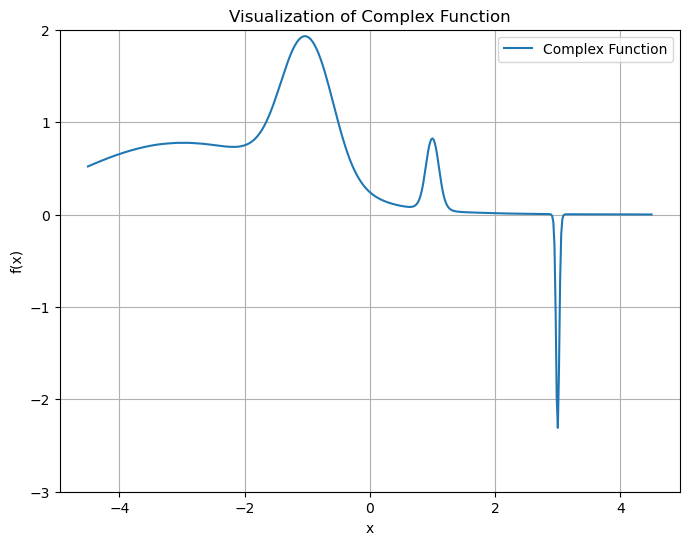

In [66]:
import matplotlib.pyplot as plt

# Define your complex function that takes parameter x
# def graph_to_plot(x, cjk = model.cjk):
def graph_to_plot(x, cjk = cjk):
    cjk = cjk.tolist()
    return f_new(x, cjk)

#math functions
def psi_new(x):
    a = 1 + np.exp(2 - (10 * x))
    b = 1 + np.exp(2 + (10 * x))
    res =  (1 - (1 / a)) * (1 - (1 / b))
    return res


#here c is a tensor of 49 values [-3-3,.......]
def f_new(x, c):
    fx = 0
    for j in range(-3, 4):
        for k in range(-3, 4):
            i = jkToIndex(j,k)
            cjk = c[i]
            multiplier = x - k
            psi_inp = (2 ** j) * multiplier
            psi_out = psi_new(psi_inp)
            fx += cjk * psi_out
    return fx

def plot_graph(fn):
    # Generate x values
    x = torch.linspace(-4.5, 4.5, 500)

    # Calculate y values using the complex function
    y = [fn(x_val) for x_val in x]

    # Create a figure
    plt.figure(figsize=(8, 6))

    # Plot the complex function
    plt.plot(x, y, label='Complex Function')

    # Set y-axis limits
    plt.ylim(-3, 2)

    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Visualization of Complex Function')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

plot_graph(graph_to_plot)


In [71]:
cjk

tensor([ 9.2388e-01,  1.9365e-01,  4.6698e-02,  5.4565e-03, -2.7035e-03,
        -7.6696e-03,  2.0021e-03, -6.9263e-02, -7.4792e-02, -9.3704e-02,
        -4.1682e-02, -1.0737e-02,  6.1318e-03,  1.0024e-03,  6.9368e-03,
        -1.7307e-02,  1.9780e+00, -2.2387e-02, -1.9284e-02, -1.3801e-02,
        -3.3465e-03, -8.8730e-03,  5.8961e-03,  6.1384e-03,  5.0684e-03,
         6.8378e-03,  4.7868e-03, -6.8072e-04,  6.7936e-03, -4.0948e-03,
        -4.4225e-03, -2.7702e-03,  9.9547e-01, -2.9695e-03,  1.1971e-03,
        -4.5890e-03,  2.7774e-03,  3.5447e-03,  1.8760e-03,  3.4676e-03,
         2.1315e-03, -1.0290e-03,  1.9388e-03, -1.1964e-03, -1.7046e-03,
        -8.0432e-04, -1.6205e-03, -9.5347e-04, -2.9995e+00],
       dtype=torch.float64, requires_grad=True)